# Session-3

## Import Libraries and modules

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as K
import tensorflow.keras.utils as np_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

## Load pre-shuffled MNIST data into train and test sets

- Training set contains - 60000 images mapping to categories of 0-9 numbers
- Test set contains - 10000 images

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Plot Image

Plot the first image in the series to understand the image data and get a feel for a sample. Handwritten number 5 is in the set. 

(60000, 28, 28)


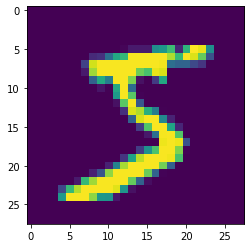

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Add Channel Information

The dataset does not have a channels layer as it's a grey scale image. The channel layer is needed for image manipulation and understanding later. So a single channel is extended as a 4th dimension. 

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Convert the Data to Float

The data is to be converted to float format for better computational resolutions. This also can be GPU dependent. Some GPUs may perform faster on fixed point or integral data type. Since the accuracy requirements higher in this problem one may prefer floats to gain better data resolution. 

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## List Multiclass Data of the Dependent Variable

First 10 category outputs of the dependent variable in the training set. 

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Conversion to Categorical One Hot Vector Notation

Neural networks are best represented as 0 and 1 post final activation. Particularly, when softmax is used as the activation function. This notation makes it easier for modeling. 

In [7]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## List One Hot Vector Notation of the Dependent Variable

First 10 category outputs of dependent variable in training set.

In [8]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Definition of the Model

1. Sequential model of Keras
2. Extracting initial 32x3x3 kernel and extract simple edges 
3. Aggregate the features to 10x1x1 kernel
4. Apply 10x26x26 to extract further features and output of 10x1x1
5. Flatten the output to 10 outputs matching the One Hot Vector
6. Apply the softmax activation.

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), name='c1'))
model.add(Conv2D(10, (1, 1), activation='relu', name='c2'))
model.add(Conv2D(10, (26, 26), name='c3'))
model.add(Flatten(name='f'))
model.add(Activation('softmax', name='softmax'))


W0822 00:52:46.021076 140536702244672 deprecation.py:506] From /home/sambit/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Summary of the Model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c1 (Conv2D)                  (None, 26, 26, 32)        320       
_________________________________________________________________
c2 (Conv2D)                  (None, 26, 26, 10)        330       
_________________________________________________________________
c3 (Conv2D)                  (None, 1, 1, 10)          67610     
_________________________________________________________________
f (Flatten)                  (None, 10)                0         
_________________________________________________________________
softmax (Activation)         (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

The model is to be compiled with categorical cross entropy with ADAM optimizer with increased accuracy as the metric.

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Training

The model is trained with the training data at batch size of 32 for 10 epochs. At every batch size the parameters are updated as part of the stochastic process. 

On training data 99.66% accuracy was observed. However, this may not be still good enough for the validation test data. There may be a possibility of overfitting the output to the training data.

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1887 - acc: 0.9459 - val_loss: 0.0812 - val_acc: 0.9754
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0688 - acc: 0.9794 - val_loss: 0.0613 - val_acc: 0.9781
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0505 - acc: 0.9847 - val_loss: 0.0605 - val_acc: 0.9810
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0387 - acc: 0.9877 - val_loss: 0.0597 - val_acc: 0.9810
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0306 - acc: 0.9904 - val_loss: 0.0566 - val_acc: 0.9828
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0239 - acc: 0.9924 - val_loss: 0.0585 - val_acc: 0.9824
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0197 - acc: 0.9937 - val_loss: 0.

## Validation

Validation is carried out with the test data and score is is computed. The score is essentially the accuracy obtained by the evaluating the model against the portion of the data specifically carved out for testing. 

As can be seen the validation outcome is 98.16% clearly a significant departure from the traing outcome confirming overfitting of the model. 

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print(score)

[0.07847292177852433, 0.9828]


## Prediction

Taking a the test data values are predicted. This can be compared with the output of the test data to confirm the quality of the prediction.

In [15]:
y_pred = model.predict(X_test)

In [16]:
np.set_printoptions(precision=1, suppress=True)
print(y_pred[:10])
print(y_test[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[7 2 1 0 4 1 4 9 5 9]


## Kernel Visualization

Although the kernels are an important entity in a CNN, it's never easy to visualize what features are extracted from the image. Kernels directly will have only floating point numbers which have little visualization ability. A reverse computation is carried out applying gradients over a short set of data over a few iterations to show actually what features are captured.

Running the kernel over the input data for 20 iteration, gives an idea of the features extracted on application of the kernel. 

In [17]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

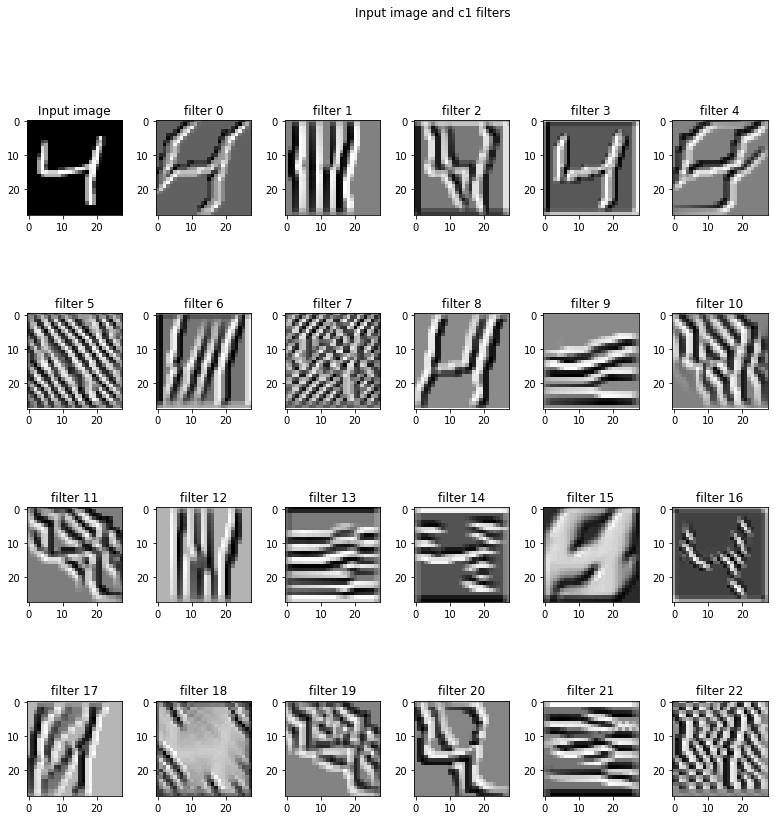

In [18]:
import numpy as np
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'c1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

## Improved Model

An improved model is proposed with a goal to show validation accuracy above 99.4%. A sequential Model is designed with:

1. 2 16x3x3 Convolutiion with ReLu Activation
2. MaxPool2D of 2x2 
3. 2 16x3x3 Convolutiion with ReLu Activation
4. MaxPool2D of 2x2 
5. 1 64x3x3 Convolutiion with ReLu Activation
6. 1 10x2x2 No activations 
7. Flatten the results 
8. Softmax activation to match the outcome to One Hot Vector notation

Overall 18,970 parameters

Loss function chosen is *poisson* of form:  $$\sum_{i=1}^{N} y_p - y_t*log(y_p)$$

unlike categorical crossentropy: $$\sum_{i=1}^{N} - y_t*log(y_p)$$

that does not penalize for other values of wrong prediction where the maximum predicted value may not be at the target category index.


In [19]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(10, (2, 2)))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

model.compile(loss='poisson', optimizer='adam', metrics=['categorical_accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 64)         

## Training Process

While most of the model part is fairly kept standard with CNN with a combination of convolutions and maxpooling the training approach is enhanced with an ensemble technique called stratfied K-fold. 

The training for a neural network can be improved when optimal statistical mixing can be carried out for the input for a homogenized mix of batches. This is achieved by stratified k-fold. Here the training data is broken into disjoint sets of 5 with almost equal sample occurence of any of the classes of 0-9 in each of the groups. 4 such groups are used as a training set and validated against one of the set as validation set. Thus the results are cross validated against each other. This ensures the batches are homogeneous and uniformly exposed to the each category of the inputs. Each such groups is run for 10 epochs but parameters being fed from the previous run. 

Moreover, in every epoch the validation rsults are computed with the original test dataset of 10000 data points.


The technique has been a small modification of explanation given in the [article](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/)

The best output was shown with accuracy of: **99.36%**

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold

earlystop = EarlyStopping(monitor='acc', patience=5, verbose=1, restore_best_weights=True)

seed = 7
np.random.seed(seed)
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
(X, Y) = (X_train, y_train)
for train, test in kfold.split(X, Y):
    # Fit the model
    model.fit(X[train], Y_train[train], epochs=15, batch_size=128, verbose=1, validation_data=(X_test, Y_test))
    # evaluate the model
    scores = model.evaluate(X[test], Y_train[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

Train on 47995 samples, validate on 10000 samples
Epoch 1/15
47995/47995 [==============================] - 2s 44us/sample - loss: 0.1373 - categorical_accuracy: 0.8866 - val_loss: 0.1091 - val_categorical_accuracy: 0.9711
Epoch 2/15
47995/47995 [==============================] - 2s 40us/sample - loss: 0.1095 - categorical_accuracy: 0.9703 - val_loss: 0.1053 - val_categorical_accuracy: 0.9830
Epoch 3/15
47995/47995 [==============================] - 2s 39us/sample - loss: 0.1066 - categorical_accuracy: 0.9791 - val_loss: 0.1045 - val_categorical_accuracy: 0.9839
Epoch 4/15
47995/47995 [==============================] - 2s 39us/sample - loss: 0.1051 - categorical_accuracy: 0.9837 - val_loss: 0.1044 - val_categorical_accuracy: 0.9845
Epoch 5/15
47995/47995 [==============================] - 2s 40us/sample - loss: 0.1044 - categorical_accuracy: 0.9859 - val_loss: 0.1039 - val_categorical_accuracy: 0.9874
Epoch 6/15
47995/47995 [==============================] - 2s 39us/sample - loss: 0.10

48003/48003 [==============================] - 2s 38us/sample - loss: 0.1009 - categorical_accuracy: 0.9971 - val_loss: 0.1041 - val_categorical_accuracy: 0.9895
Epoch 2/15
48003/48003 [==============================] - 2s 39us/sample - loss: 0.1004 - categorical_accuracy: 0.9988 - val_loss: 0.1034 - val_categorical_accuracy: 0.9929
Epoch 3/15
48003/48003 [==============================] - 2s 38us/sample - loss: 0.1003 - categorical_accuracy: 0.9991 - val_loss: 0.1037 - val_categorical_accuracy: 0.9917
Epoch 4/15
48003/48003 [==============================] - 2s 38us/sample - loss: 0.1004 - categorical_accuracy: 0.9987 - val_loss: 0.1043 - val_categorical_accuracy: 0.9910
Epoch 5/15
48003/48003 [==============================] - 2s 38us/sample - loss: 0.1002 - categorical_accuracy: 0.9993 - val_loss: 0.1039 - val_categorical_accuracy: 0.9915
Epoch 6/15
48003/48003 [==============================] - 2s 39us/sample - loss: 0.1004 - categorical_accuracy: 0.9988 - val_loss: 0.1046 - val_ca

## Results

The final cross validation score is averaged over each of the iterations are stated. As expected, the cross validation being on the training data there is a continuous pattern of overfitting of the data. However, what is interesting to observe the validation score over the test data has also significantly improved at **99.39%**. 

In [21]:
cvscores

[99.04206395149231,
 99.3584394454956,
 99.71666932106018,
 99.64157938957214,
 99.97498989105225]

In [22]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.1038 - categorical_accuracy: 0.9934


In [23]:
print(score)

[0.1037611630320549, 0.9934]


In [24]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=1, suppress=True)
print(y_pred[:10])
print(y_test[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[7 2 1 0 4 1 4 9 5 9]
